In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Assignment-1/Copy of WHR-2024-5CS037.csv")
print(data.head(10))
print("Number of rows:", data.shape[0])
print("Number of column:", data.shape[1])
print(data.dtypes)
print("Mean Score:", data['score'].mean)
print("Median Score:", data['score'].median)
print("Standard Deviation of Score:", data['score'].std())
print("Country with the highest Score:", data.loc[data['score'].idxmax()]['Country name'])
print("Country with the lowest Score:", data.loc[data['score'].idxmin()]['Country name'])
print(data.isnull().sum())
filtered_data = data[data['score'] > 7.5]
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print(sorted_data.head(10))

def categorize_happiness(score):
  if score < 4:
    return 'Low'
  elif 4 <= score <= 6:
    return 'Medium'
  else:
    return 'High'
data['Happiness Category'] = data['score'].apply(categorize_happiness)
print(data.head())


  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

Data Visualization
   
   Bar plot


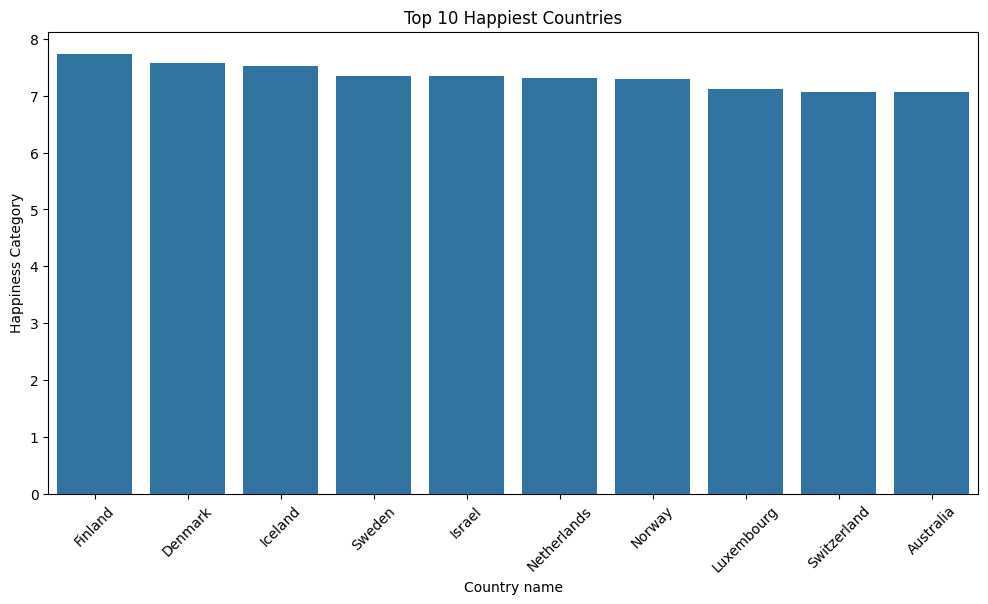

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Assignment-1/Copy of WHR-2024-5CS037.csv")
top_10_happiest = data.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country name', y='score', data=top_10_happiest)
plt.title('Top 10 Happiest Countries')
plt.xlabel('Country name')
plt.ylabel('Happiness Category')
plt.xticks(rotation=45)
plt.show()

Line Plot


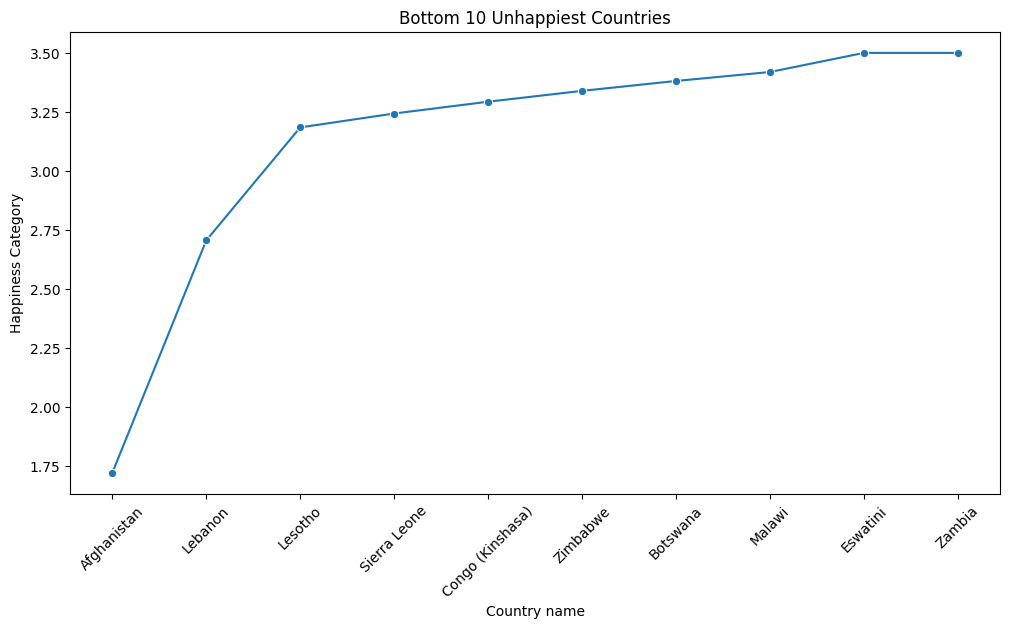

In [5]:
bottom_10_unhappiest = data.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Country name', y='score', data=bottom_10_unhappiest, marker='o')
plt.title('Bottom 10 Unhappiest Countries')
plt.xlabel('Country name')
plt.ylabel('Happiness Category')
plt.xticks(rotation=45)
plt.show()

Histogram for Score Distribution

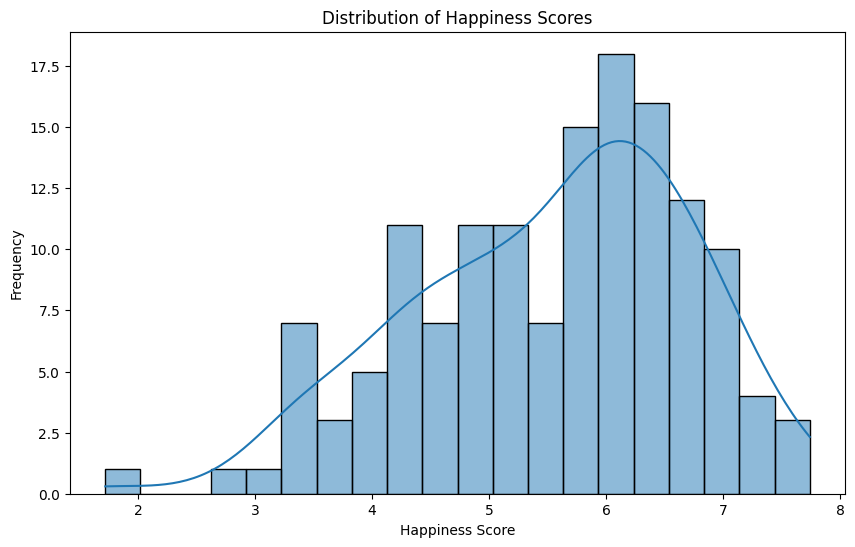

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

Scatter Plot: GDP and Score

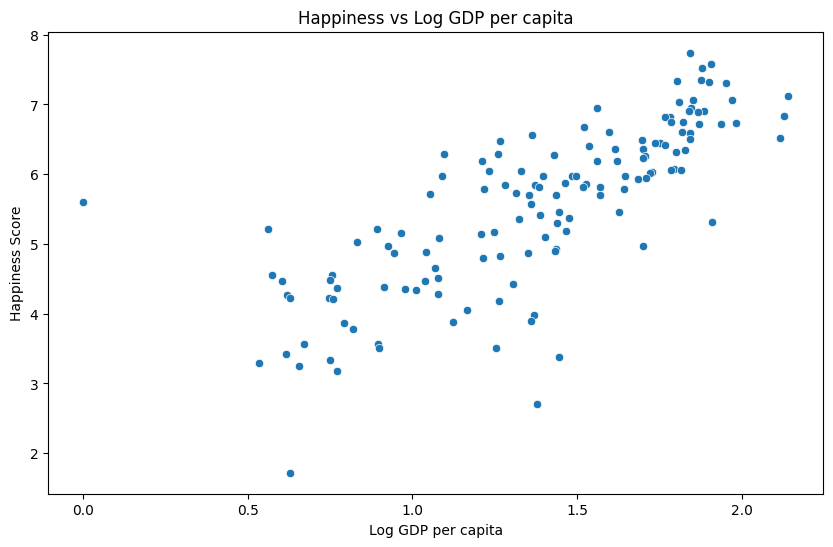

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data)
plt.title('Happiness vs Log GDP per capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.show()


Problem- 2

   Task - 1

In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/Assignment-1/Copy of WHR-2024-5CS037.csv")
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asian_data = data[data['Country name'].isin(south_asian_countries)]
south_asian_data.to_csv('south_asian_data.csv', index=False)
south_asian_data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672


Task - 2

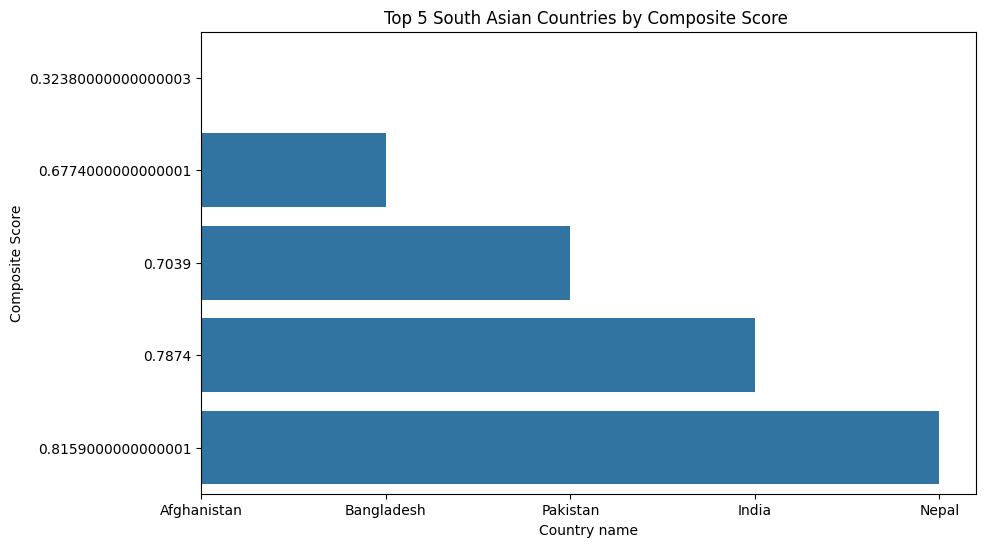

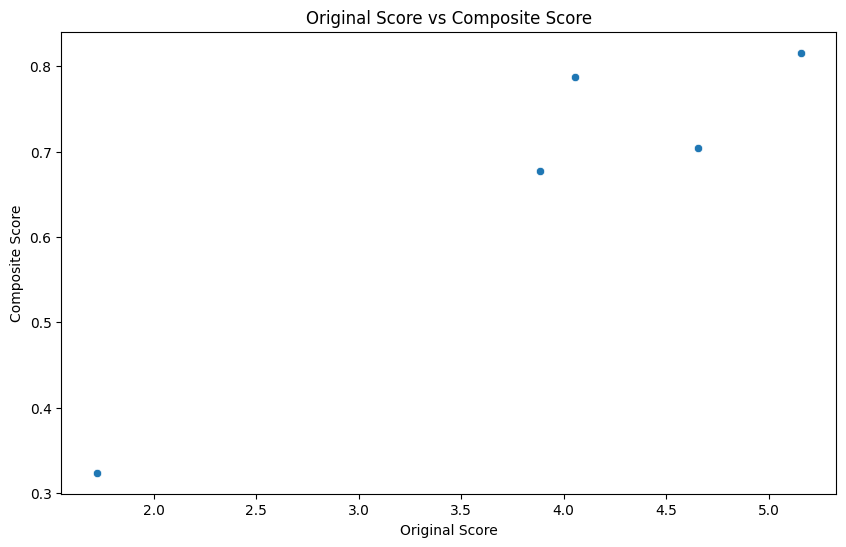

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
south_asian_data['Composite Score'] = 0.4 * south_asian_data['Log GDP per capita'] + 0.3 * south_asian_data['Social support'] + 0.3 * south_asian_data['Healthy life expectancy']
south_asian_data = south_asian_data.sort_values(by='Composite Score', ascending=False)
#Visualization using horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='Composite Score', data=south_asian_data.head(5), orient ='h')
plt.title('Top 5 South Asian Countries by Composite Score ')
plt.xlabel('Country name')
plt.ylabel('Composite Score')
plt.show()
# Visualization the relationship between the original score and the Composite score using Scatter plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='Composite Score', data=south_asian_data)
plt.title('Original Score vs Composite Score')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.show()


Task - 3

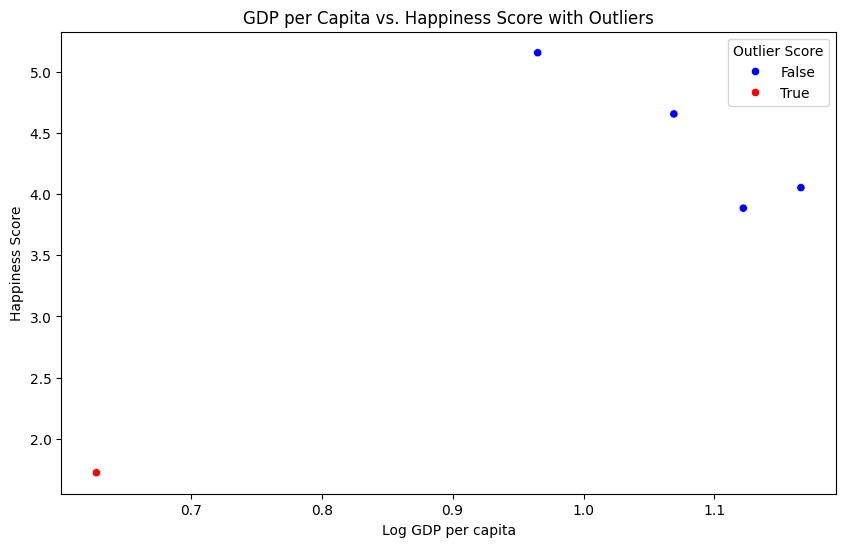

Outlier Countries:
142    Afghanistan
Name: Country name, dtype: object


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Q1_score = south_asian_data['score'].quantile(0.25)
Q3_score = south_asian_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asian_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

outlier_threshold_score = 1.5 * IQR_score
outlier_threshold_gdp =  1.5 * IQR_gdp

south_asian_data['Outlier Score'] = (south_asian_data['score'] < (Q1_score - outlier_threshold_score)) | (south_asian_data['score'] > (Q3_score + outlier_threshold_score)) | (south_asian_data['Log GDP per capita'] < (Q1_gdp - outlier_threshold_gdp)) | (south_asian_data['Log GDP per capita'] > (Q3_gdp + outlier_threshold_gdp))

#creating Scatter plot with outlier Highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_data, hue='Outlier Score', palette=['blue', 'red'])
plt.title('GDP per Capita vs. Happiness Score with Outliers')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

print("Outlier Countries:")
print(south_asian_data[south_asian_data['Outlier Score']]['Country name'])

Task - 4


Correlation between Happiness Score and Freedom to make life choices: 0.801497903141921
Correlation between Happiness Score and Generosity: 0.8773326267276358


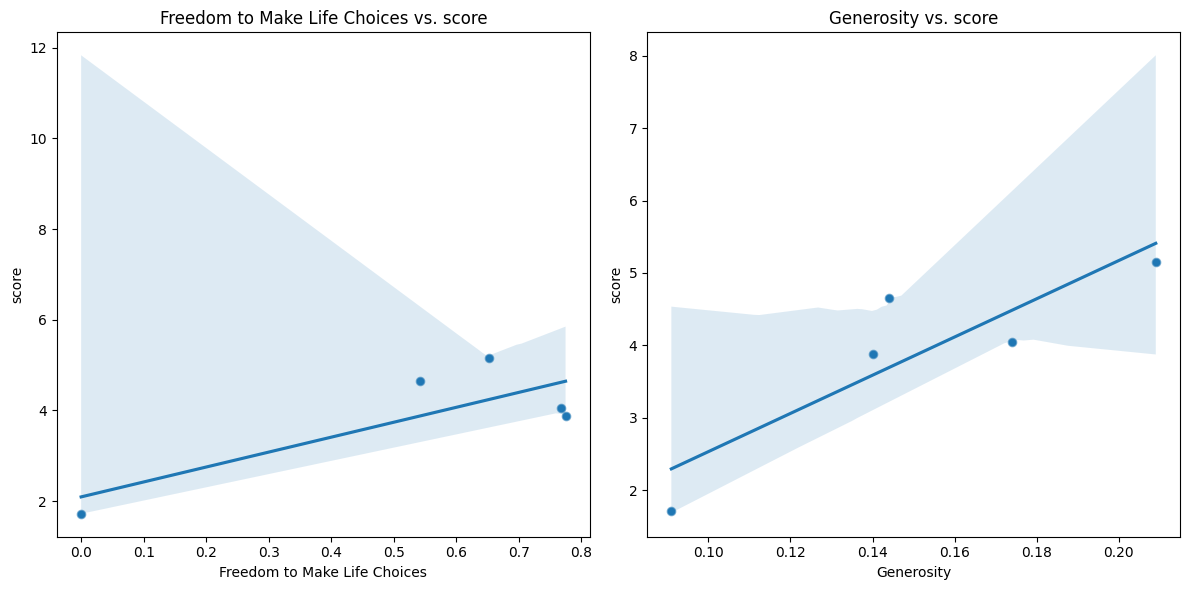

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/Assignment-1/Copy of WHR-2024-5CS037.csv")
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asian_data = data[data['Country name'].isin(south_asian_countries)]

correlation_freedom = south_asian_data['score'].corr(south_asian_data['Freedom to make life choices'])
correlation_generosity = south_asian_data['score'].corr(south_asian_data['Generosity'])
print("Correlation between Happiness Score and Freedom to make life choices:", correlation_freedom)
print("Correlation between Happiness Score and Generosity:", correlation_generosity)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asian_data)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_data, scatter_kws={'alpha': 0.5})
plt.title('Freedom to Make Life Choices vs. score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=south_asian_data)
sns.regplot(x='Generosity', y='score', data=south_asian_data, scatter_kws={'alpha': 0.5})
plt.title('Generosity vs. score')
plt.xlabel('Generosity')
plt.ylabel('score')

plt.tight_layout()
plt.show()

<ipython-input-12-150719f6e3a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']


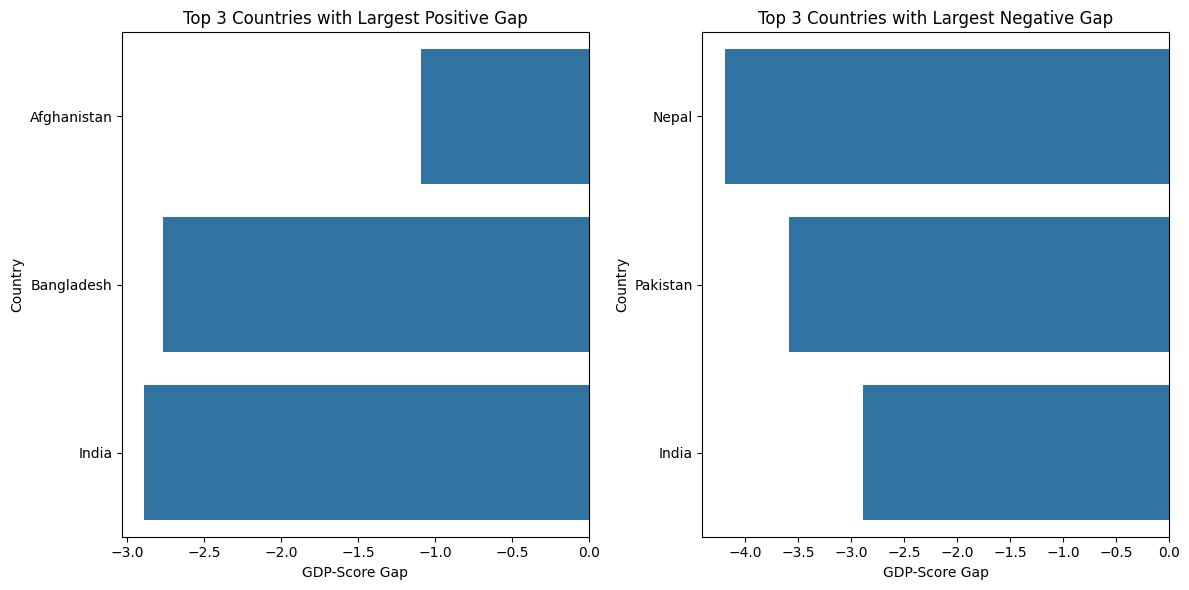

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate GDP-Score Gap
south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']

# Rank countries by GDP-Score Gap
ranked_by_positive_gap = south_asian_data.sort_values(by='GDP-Score Gap', ascending=False)
ranked_by_negative_gap = south_asian_data.sort_values(by='GDP-Score Gap', ascending=True)

# Visualize top 3 countries with largest positive and negative gaps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='GDP-Score Gap', y='Country name', data=ranked_by_positive_gap.head(3), orient='h')
plt.title('Top 3 Countries with Largest Positive Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x='GDP-Score Gap', y='Country name', data=ranked_by_negative_gap.head(3), orient='h')
plt.title('Top 3 Countries with Largest Negative Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

Problem - 3
    Task-1

South Asia:
Mean Score: 3.8952000000000004
Standard Deviation of Score: 1.3160025455902433

Middle East:
Mean Score: 5.412100000000001
Standard Deviation of Score: 1.5662011684327144

Middle East has a higher average happiness score.


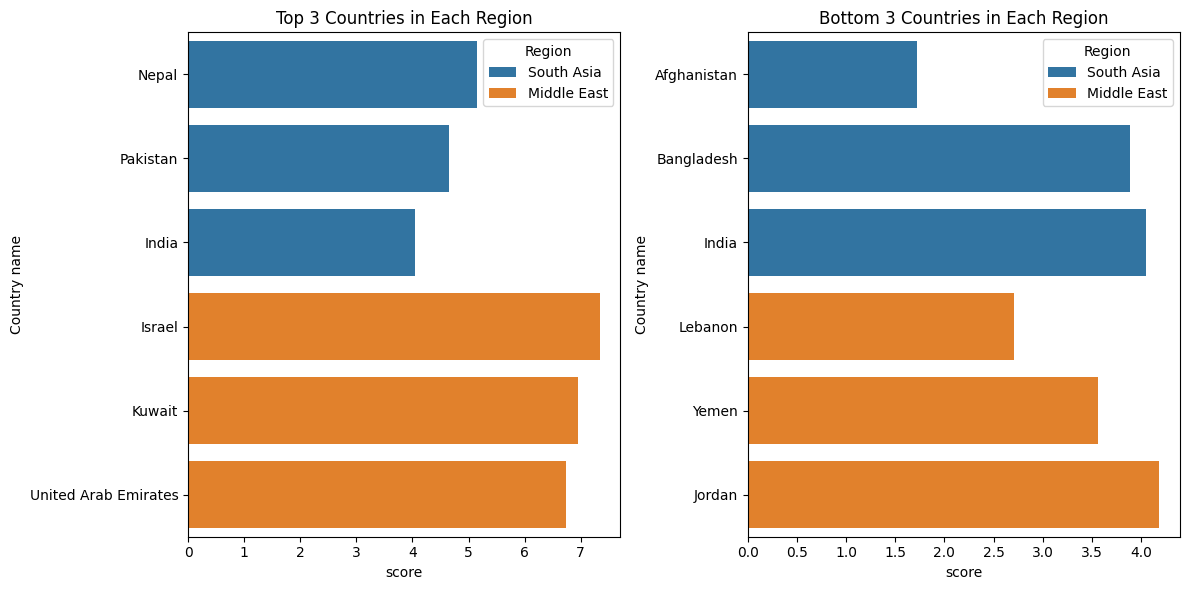

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter the dataset for Middle Eastern countries
middle_east_df = data[data['Country name'].isin(middle_east_countries)]

#DESCRIPTIVE STATISTICS
print("South Asia:")
print("Mean Score:", south_asian_data['score'].mean())
print("Standard Deviation of Score:", south_asian_data['score'].std())

print("\nMiddle East:")
print("Mean Score:", middle_east_df['score'].mean())
print("Standard Deviation of Score:", middle_east_df['score'].std())
if south_asian_data['score'].mean() > middle_east_df['score'].mean():
    print("\nSouth Asia has a higher average happiness score.")
else:
    print("\nMiddle East has a higher average happiness score.")

#Top and Bottom Performers
top_3_south_asia = south_asian_data.nlargest(3, 'score')
bottom_3_south_asia = south_asian_data.nsmallest(3, 'score')

top_3_middle_east = middle_east_df.nlargest(3, 'score')
bottom_3_middle_east = middle_east_df.nsmallest(3, 'score')

top_3_south_asia['Region'] = 'South Asia'
top_3_middle_east['Region'] = 'Middle East'

combined_top_3 = pd.concat([top_3_south_asia, top_3_middle_east])

bottom_3_south_asia['Region'] = 'South Asia'
bottom_3_middle_east['Region'] = 'Middle East'

combined_bottom_3 = pd.concat([bottom_3_south_asia, bottom_3_middle_east])
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=combined_top_3, hue='Region', orient='h')
plt.title('Top 3 Countries in Each Region')
plt.xlabel('score')
plt.ylabel('Country name')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=combined_bottom_3, hue='Region', orient='h')
plt.title('Bottom 3 Countries in Each Region')
plt.xlabel('score')
plt.ylabel('Country name')

plt.tight_layout()
plt.show()

<ipython-input-23-d575e0ecdb53>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Metric', y='Value', hue='Region', data=combined_df, ci=None)


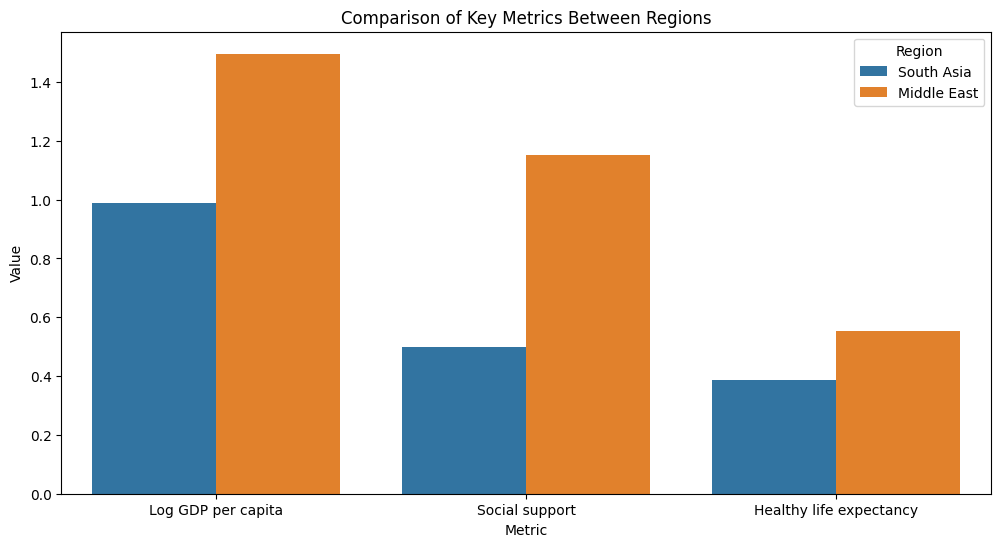

In [23]:
# Melt the DataFrames for easier plotting
melted_south_asia = south_asian_data[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']].melt(id_vars='Country name', var_name='Metric', value_name='Value')
melted_middle_east = middle_east_df[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']].melt(id_vars='Country name', var_name='Metric', value_name='Value')

# Combine the melted DataFrames and add a 'Region' column
combined_df = pd.concat([melted_south_asia.assign(Region='South Asia'), melted_middle_east.assign(Region='Middle East')])

combined_df = combined_df.reset_index(drop=True)

# Grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=combined_df, ci=None)
plt.title('Comparison of Key Metrics Between Regions')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

South Asia Correlation Matrix:
                                  score  Freedom to make life choices  \
score                         1.000000                      0.801498   
Freedom to make life choices  0.801498                      1.000000   
Generosity                    0.877333                      0.740660   

                              Generosity  
score                           0.877333  
Freedom to make life choices    0.740660  
Generosity                      1.000000  

Middle East Correlation Matrix:
                                  score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


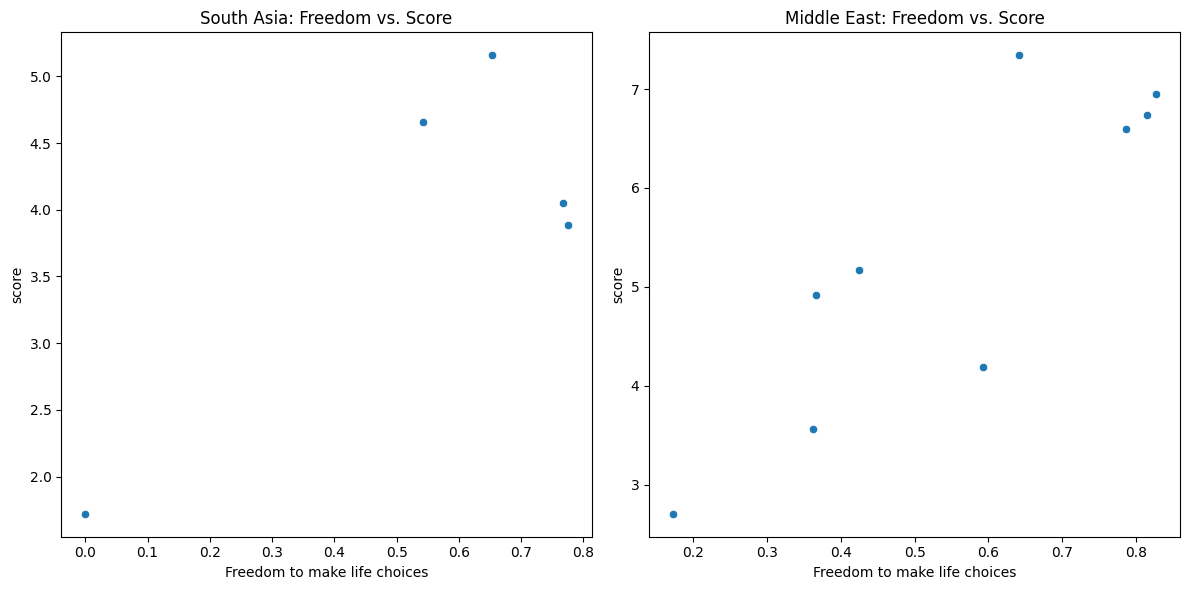

In [24]:
# Correlation matrix for South Asia
corr_south_asia = south_asian_data[['score', 'Freedom to make life choices', 'Generosity']].corr()
print("South Asia Correlation Matrix:\n", corr_south_asia)

# Correlation matrix for Middle East
corr_middle_east = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
print("\nMiddle East Correlation Matrix:\n", corr_middle_east)

# Scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asian_data)
plt.title('South Asia: Freedom vs. Score')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_df)
plt.title('Middle East: Freedom vs. Score')

plt.tight_layout()
plt.show()

<ipython-input-28-28220433a7c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_data['is_outlier'] = south_asian_data['score'] < lower_score_threshold_south_asia
<ipython-input-28-28220433a7c9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_df['is_outlier'] = middle_east_df['score'] < lower_score_threshold_middle_east


Lower Score Threshold for South Asia: 2.7295000000000003
Lower Score Threshold for Middle East: 0.8782500000000013


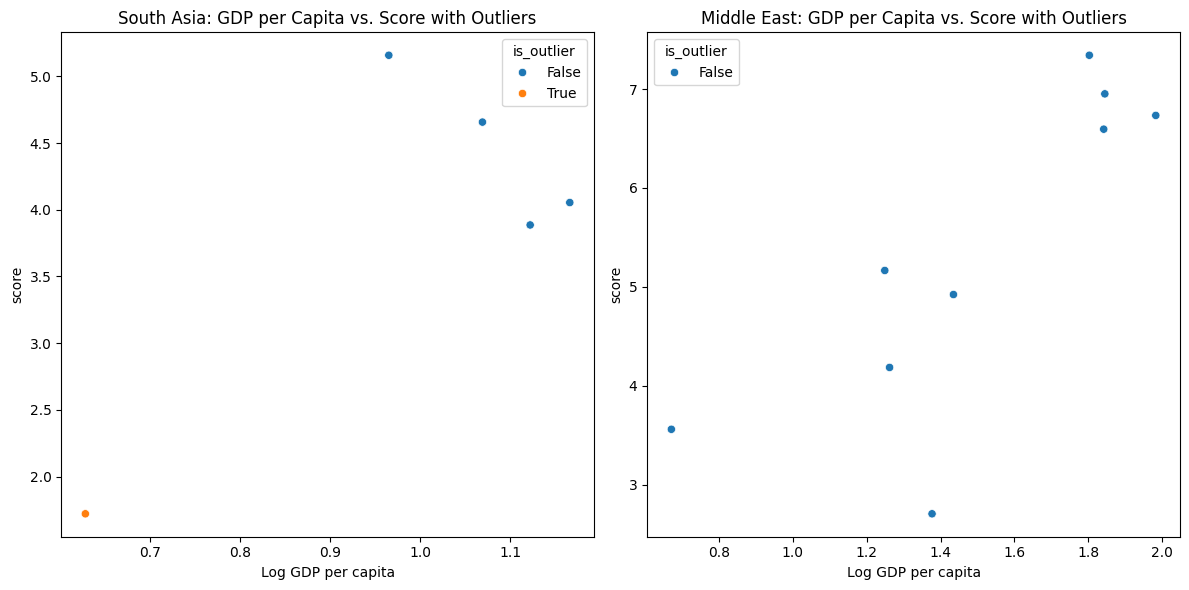

In [28]:
# For South Asia
Q1_south_asia = south_asian_data['score'].quantile(0.25)
Q3_south_asia = south_asian_data['score'].quantile(0.75)
IQR_south_asia = Q3_south_asia - Q1_south_asia
lower_score_threshold_south_asia = Q1_south_asia - 1.5 * IQR_south_asia

south_asian_data['is_outlier'] = south_asian_data['score'] < lower_score_threshold_south_asia

# For Middle East
Q1_middle_east = middle_east_df['score'].quantile(0.25)
Q3_middle_east = middle_east_df['score'].quantile(0.75)
IQR_middle_east = Q3_middle_east - Q1_middle_east
lower_score_threshold_middle_east = Q1_middle_east - 1.5 * IQR_middle_east

middle_east_df['is_outlier'] = middle_east_df['score'] < lower_score_threshold_middle_east

print("Lower Score Threshold for South Asia:", lower_score_threshold_south_asia)
print("Lower Score Threshold for Middle East:", lower_score_threshold_middle_east)
# Identify outliers in each region
south_asian_outliers = south_asian_data[south_asian_data['score'] < lower_score_threshold_south_asia]
middle_east_outliers = middle_east_df[middle_east_df['score'] < lower_score_threshold_middle_east]

# Plot outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_data, hue='is_outlier')
plt.title('South Asia: GDP per Capita vs. Score with Outliers')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_df, hue='is_outlier')
plt.title('Middle East: GDP per Capita vs. Score with Outliers')

plt.tight_layout()
plt.show()

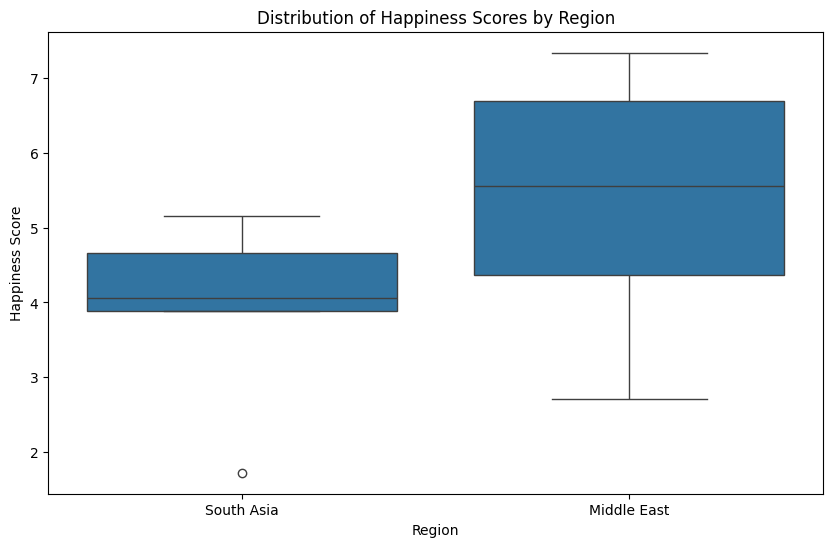

In [30]:
plt.figure(figsize=(10, 6))
combined_data = pd.concat([south_asian_data.assign(Region='South Asia'), middle_east_df.assign(Region='Middle East')])
sns.boxplot(x='Region', y='score', data=combined_data)
plt.title('Distribution of Happiness Scores by Region')
plt.ylabel('Happiness Score')
plt.show()